One of the main applications of k-means clustering is vector quantization. Simply speaking,
vector quantization is the N-dimensional version of "rounding off". When we deal with 1D data,
such as numbers, we use the rounding-off technique to reduce the memory needed to store that
value. For example, instead of storing 23.73473572, we just store 23.73 if we want to be
accurate up to the second decimal place. Or, we can just store 24 if we don't care about
decimal places. It depends on our needs and the trade-off that we are willing to make.

Similarly, when we extend this concept to N-dimensional data, it becomes vector quantization.
Of course, there are more nuances to it. You can learn more about it at 
http://www.data-compression.com/vq.shtml. Vector quantization is popularly used in image
compression where we store each pixerl using fewer bits than the original image to achieve
compression.

In [1]:
import sys
sys.argv[1:] = ['--input-file', 'flower_image.jpg', '--num-bits', '4']

In [2]:
import argparse

import numpy as np
import imageio
from sklearn import cluster
import matplotlib.pyplot as plt

In [3]:
def build_arg_parser():
    parser = argparse.ArgumentParser(description='Compress the input image \
            using clustering')
    parser.add_argument("--input-file", dest="input_file", required=True,
            help="Input image")
    parser.add_argument("--num-bits", dest="num_bits", required=False,
            type=int, help="Number of bits used to represent each pixel")
    return parser

In [4]:
def compress_image(img, num_clusters):
    # Convert input image into (num_samples, num_features) 
    # array to run kmeans clustering algorithm 
    X = img.reshape((-1, 1))  

    # Run kmeans on input data
    kmeans = cluster.KMeans(n_clusters=num_clusters, n_init=4, random_state=5)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_.squeeze()
    labels = kmeans.labels_

    # Assign each value to the nearest centroid and 
    # reshape it to the original image shape
    input_image_compressed = np.choose(labels, centroids).reshape(img.shape)

    return input_image_compressed

In [5]:
def plot_image(img, title):
    vmin = img.min()
    vmax = img.max()
    plt.figure()
    plt.title(title)
    plt.imshow(img.astype(np.uint8), cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

The size of the image will be reduced by a factor of 2.0

Compression rate = 50.0%


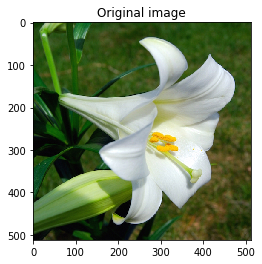

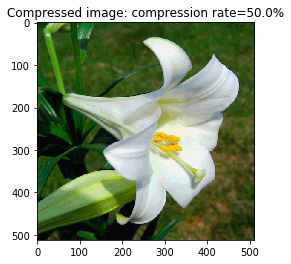

In [6]:
if __name__=='__main__':
    args = build_arg_parser().parse_args()
    input_file = args.input_file
    num_bits = args.num_bits
    
    if not 1 < num_bits <= 8:
        raise TypeError('Number of bits should be between 1 and 8')
    
    num_clusters = np.power(2, num_bits)
    
    # Print compression rate
    compression_rate = round(100 * (8.0 - args.num_bits)/ 8.0, 2)
    print ("The size of the image will be reduced by a factor of {}\n".format(8.0/args.num_bits))
    print ("Compression rate = {}%".format(compression_rate))
    
    # Load input image
    input_image = imageio.imread(input_file).astype(np.uint8)
    
    # show original image
    plot_image(input_image, 'Original image')
    
    # compressed image
    input_image_compressed = compress_image(input_image, num_clusters)
    
    # show compressed image
    plot_image(input_image_compressed, "Compressed image: compression rate={}%".format(compression_rate))
    